# This is the Final Analysis file where we conduct the analysis to answer our research questions

## Prabhmeet's Analysis:

### First we will import pandas, and use it to read the dataset. As well as do some method cleaning, and some data Wrangling. All of that has been Chained together, in the chunk , below for the purpose of ease to read , and debug.

In [4]:
import pandas as pd
from pandas_profiling import ProfileReport as pf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
## Using a seperate file to import our functions.
from scripts import project_functions as fun
%load_ext autoreload



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# This part processes the data without any method chaining.
dataSet= fun.load_process_Medical_Data('./../data/processed/Processed_Medical_Data.csv')
dataSet

,bmi,Charges_USD,BMI_Category
0,27.90,16884.9,Overweight
1,33.77,1725.6,Obese
2,33.00,4449.5,Obese
3,22.70,21984.5,Normal
4,28.88,3866.9,Overweight
...,...,...,...
1332,30.97,10600.5,Obese
1333,31.92,2206.0,Obese
1334,36.85,1629.8,Obese
1335,25.80,2007.9,Overweight


### Exploartory Research - Task 3

## This pandas Filter information, allows us to perform , and review several analytical tests , that might show some correlation. We can go through this , and see if our dataset , needs any more filtering.
	- Using this the categorize BMI was improved, as the previous version was leaving the dataset with several nan values.
	- Also some duplicate values were observed which were also removed(This change was made in the data processing file).
	- Also a decision was made to add a new column of BMI Category to help categorize the BMI's for easier understanding when producing plots.

Now we will explore the dataset Using plots.


In [6]:
dataSet = pd.DataFrame(dataSet)
pf(dataSet).to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


## Pair plots, gives us several plots for all the different variables in out data Set. 

-This will allow us to look for relationships in different variables.

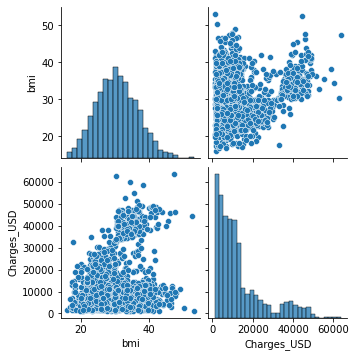

In [7]:
## Exploratory Research
plot1 = sns.pairplot(dataSet,palette="virdis")

The only thing that could be concluded from this is that , there seems to be some linear relationship between bmi , and the amount of Medical charges.

We will also get some summary statitistics for our dataset.

In [8]:
dataSet.describe().round(0).rename({'50%':'Median'}).T

,count,mean,std,min,25%,Median,75%,max
bmi,1337.0,31.0,6.0,16.0,26.0,30.0,35.0,53.0
Charges_USD,1337.0,13279.0,12110.0,1122.0,4746.0,9386.0,16658.0,63770.0


This will show us some more summary statitics based off different BMI groups.

In [9]:
dataSet.groupby('BMI_Category').agg(['mean','std','median','min','max']).round(1).drop(columns={'bmi'})

Charges_USD                                   
                    mean      std   median     min      max
BMI_Category                                               
Normal           10434.5   7512.8   8604.2  1121.9  35069.4
Obese            15572.0  14553.2  10003.7  1131.5  63770.4
Overweight       10987.5   8039.5   8659.4  1252.4  38245.6
Underweight       8657.6   7591.7   6640.5  1621.3  32734.2

 We can also use pandas profiling , to conduct even more statistical analysis on our dataset , which will also help us to look for other errors in our dataset.`

In [10]:
from pandas_profiling import ProfileReport as pf

# Your solution for `pandas_profiling`
pf(dataSet).to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


## Now we will explore some statitistical data about our data Set.

## We will Demonstrate the total number of 

The following code gives us some statistical data to explore the previous found co-relation even more. And the mean Medical charge in the Obese groups is found to be the highest.

Although the mean difference between Normal and Overweight (Medical Charges) does not seem to be much.

In [11]:
moneyStats=dataSet.groupby('BMI_Category')['Charges_USD'].agg(['mean','std','min', 'median','max']).round(1).T
moneyStats

BMI_Category,Normal,Obese,Overweight,Underweight
mean,10434.5,15572.0,10987.5,8657.6
std,7512.8,14553.2,8039.5,7591.7
min,1121.9,1131.5,1252.4,1621.3
median,8604.2,10003.7,8659.4,6640.5
max,35069.4,63770.4,38245.6,32734.2


After reviewing the results from the i-notebook , the data was cleaned accordingly. Duplicate values, and functions were fixed to a more higher decimal values , to give more accurate results.

The following code, may not be much useful but I was curious to see the percentage of US Population that is under the Obese Category.
	 - The plots produced below show us that a good chunk of the US population can be categorized as Obese, and that particular group has the highest mean Medical charges.

/Users/deol/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'BMI'),
 Text(0.5, 1.0, 'Density of BMI of various American Citizens.')]

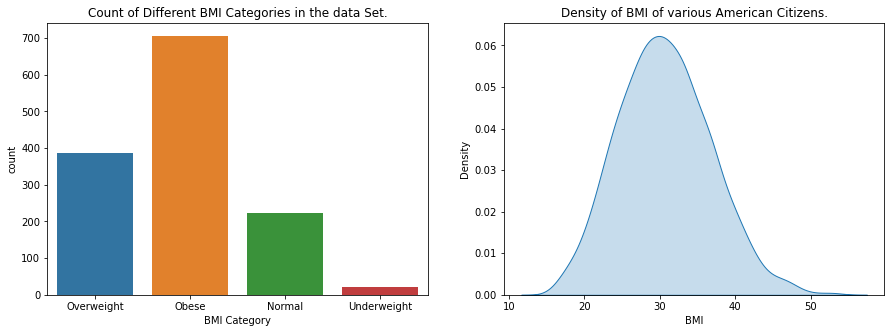

In [12]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
sns.countplot(dataSet['BMI_Category'],ax=ax[0]).set(
	xlabel = "BMI Category",
	title="Count of Different BMI Categories in the data Set.",
	
)
sns.kdeplot(
   data=dataSet, x="bmi",fill=True,ax=ax[1]
).set(
	xlabel = "BMI",
	title="Density of BMI of various American Citizens.",
	
)

The following code will help us explore the relationship between BMI Category, and Medical Charges.

In [ ]:
fig, ax =plt.subplots(2,2,figsize=(15,10))

boxplot = sns.boxplot(
	data = dataSet,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[0][0]

)
boxplot.set(
	#yscale="log",
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="Boxplot",
)
logboxplot = sns.boxplot(
	data = dataSet,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[0][1],

)
logboxplot.set(
	yscale="log",
	xlabel="BMI Category",
	ylabel="Log Transformed Mean Medical Charges in USD",
	title="Log Transformed Boxplot",
)
barplot = sns.barplot(
	data = dataSet,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[1][0],
)
barplot.set(
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="Barplot",
)
logbarplot = sns.barplot(
	data = dataSet,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[1][1],
)
logbarplot.set(
	yscale="log",
	xlabel="BMI Category",
	ylabel="Log Transformed Mean Medical Charges in USD",
	title="Log Transformed Barplot",
)
fig.tight_layout(h_pad=4,w_pad=10)
plt.suptitle("Different plots comapring mean Medical Charges of American Citizens",y=1.05)
fig.show()


 Since we can also plot numerical data with numerical data (BMI vs Medical charges),

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
scatter1=sns.scatterplot(
	data=dataSet,
	x="bmi",
	y="Charges_USD",
	hue="BMI_Category",
	ax=ax[0],
	)
scatter1.set(
	xlabel="BMI",
	ylabel="Medical Charges in USD",
	title="Normal",
)
scatter1=sns.scatterplot(
	data=dataSet,
	x="bmi",
	y="Charges_USD",
	hue="BMI_Category",
	ax=ax[1]
	)
scatter1.set(
	yscale="log",
	xlabel="BMI",
	ylabel="Medical Charges in USD",
	title="Log Transformed",
)
plt.suptitle("Scatterplot Medical Charges of American Citizens",y=1)
fig.show()

In [ ]:
regplot = sns.regplot(
	data = dataSet,
	x="bmi",
	y="Charges_USD",
)
regplot.set(
	yscale="log",
	xlabel="BMI ",
	ylabel="Medical Charges in USD",
	title="BMI vs Medical Charges of U.S. Citizens",
)

## EDA Concolusion 
- It does look like the obese category of , does on average have higher medical expenses. Although it was also found that, 50 percentile of Americans are actually Obese. Therefore this observation will be irrelevant , unless we are able to sample equal number of observations, and explore their mean medical Spending. 

## Research Question

- Does having a bmi greater than 25 result, in higher medical expenses in America .

From All the above graphs we might , assume that the obese groups have higher medical bills than other groups. Although this might be biased since we have a higher count of Obese people in our population. Therefore we will now try to sample equal observations , from each of out categories.

In [ ]:
randomSample = dataSet.groupby('BMI_Category').sample(n=20)
randomSample

Now we will try to get new Summary statitics on randomly sampled data.

In [ ]:
randomSample.groupby('BMI_Category')['Charges_USD'].agg(['mean','std','min', 'median','max']).round(1).T


## The following plots show that The Obese group still has the highest median Medcial Charges , although we do not see a linear trend from underweight to obese. i.e The Overweight did not show evidence of having a higher mean that Normal people, even though Obese people did.

In [ ]:
fig, ax =plt.subplots(2,2,figsize=(15,10))

boxplot = sns.boxplot(
	data = randomSample,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[0][0]

)
boxplot.set(
	#yscale="log",
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="Boxplot",
)
logboxplot = sns.boxplot(
	data = randomSample,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[0][1],

)
logboxplot.set(
	yscale="log",
	xlabel="BMI Category",
	ylabel="Log Transformed Mean Medical Charges in USD",
	title="Log Transformed Boxplot",
)
barplot = sns.barplot(
	data = randomSample,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[1][0],
)
barplot.set(
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="Barplot",
)
logbarplot = sns.barplot(
	data = randomSample,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
	ax=ax[1][1],
)
logbarplot.set(
	yscale="log",
	xlabel="BMI Category",
	ylabel="Log Transformed Mean Medical Charges in USD",
	title="Log Transformed Barplot",
)
fig.tight_layout(h_pad=4,w_pad=10)
plt.suptitle("Different plots comapring mean Medical Charges of American Citizens",y=1.05)
fig.show()

Also the scatter plot before fail to show any linear co-relation between bmi and Medical Charges.

## Research Conclusion.
- As per the data explore , having a BMI over 25 in America did not seem to be related with higher medical Expenses.
- Although it was found that more than 50% of Americans can be categorized as Obsese as per [CDC guidelines](https://www.cdc.gov/healthyweight/assessing/index.html). Although being Obese did seem to be related to higher Medical charges, a linear relationship between BMI and higher medical expenses was not observed.

## Ishita's Analysis:

*My Research questions:*
- Does the geographical location play a part in increased medical costs?
- Is there a relationship or correlation between being a smoker and having higher medical costs?

I used a lot of plots and graphs to visualize my dataset to help answer my research questions.

When I created a correlation matrix, I observed that the pearson correlation coefficient, which is a measure of the linear association between two variables, had a very high value of 0.79 between the \"Medical Costs\" and the \"Smoker\" variable. This indicates that there is a positive linear correlation between the variables.

A scatterplot of Medical charges by regions in the USA showed that there is not a significant difference in the medical charges amongst the different regions. To further explore this relationship, I created a boxplot and a violinplot. Both of these plots also suggested that there was no notable difference in the medical charges. However, both of these plots demonstrated that the 'southeast' region had higher medical costs, while 'southwest' seemed to have the least costs.

The plots can be found below: 

![Region Plots](region.jpeg)

*Note:*
- All of the data and code used to create these plots can be found in my analysis folder (Ishita Gupta).
- If the images are not visible on GitHub, you can view them by going to ../analysis/region.jpeg 

Next, I analyzed the relationship between the 'Smoker' variable and the 'Medical Charges' variable.

I started by creating a boxplot of medical charges by whether the person is a smoker or not. This boxplot displayed immense evidence that a smoker has higher medical costs on average. The minimum value of the medical costs of a smoker also appears to be higher than the value of the upper quartile of a non-smoker.

I also created two barplots displaying the medical charges by 'region' and 'smoker'. This was to combine both my research questions and visualize the data together. Both of the barplots confirmed the previous observations that there was not much evidence to say that a particular region had much higher medical costs and that it was very evident that a smoker had to incur more medical charges in the United States.

These plots can be found below:

![Smoker and Region Plots](smoker.jpeg)

*Note:* If the image is not visible on GitHub, it can be viewed by going to ../analysis/smoker.jpeg

### Conclusion:

Upon analyzing and visualizing the data, we can reach the following conclusions:

- There does not appear to be a causal relationsip or a correlation amongst the different regions in the United States and the medical charges people incur in those areas. However, it is apparent that the 'southeast' region has a higher medical cost. This could be explored by experts, who could conduct research and collect more data to better understand this relationship.
- There appears to be a strong correlation among whether the person is a smoker and their medical charges. However, when the data was analyzed, it was found that the number of non-smokers in the dataset were far greater than the number of smokers. This difference in the count could also be a factor in this vast difference in the medical costs.